In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
import sklearn


In [4]:
df = pd.read_csv(r'C:\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [7]:
#narrow down the dataset
df = df.sample(frac = 0.1, random_state = 1)

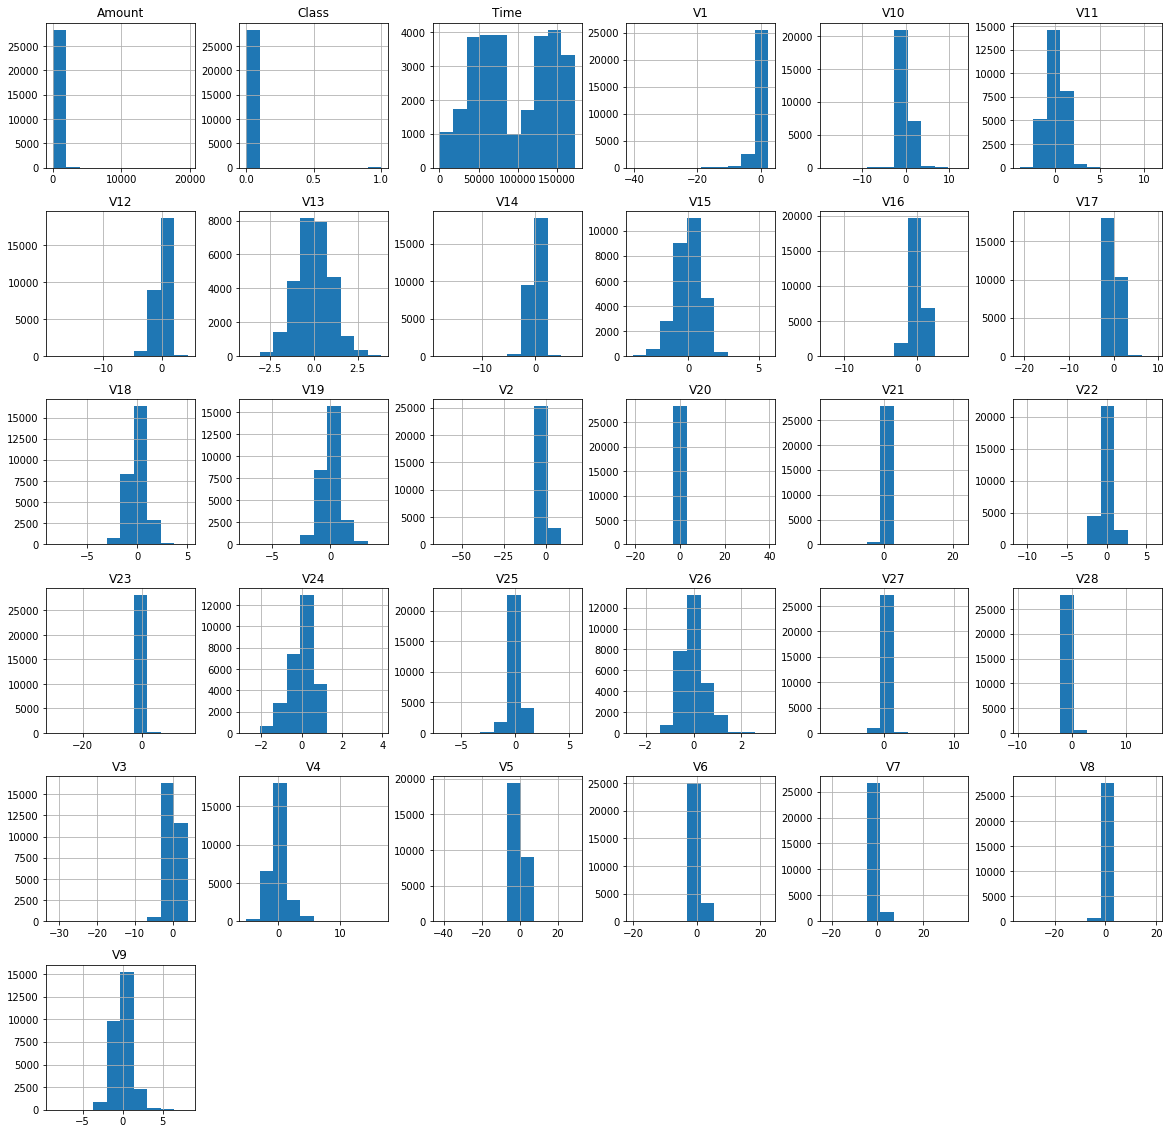

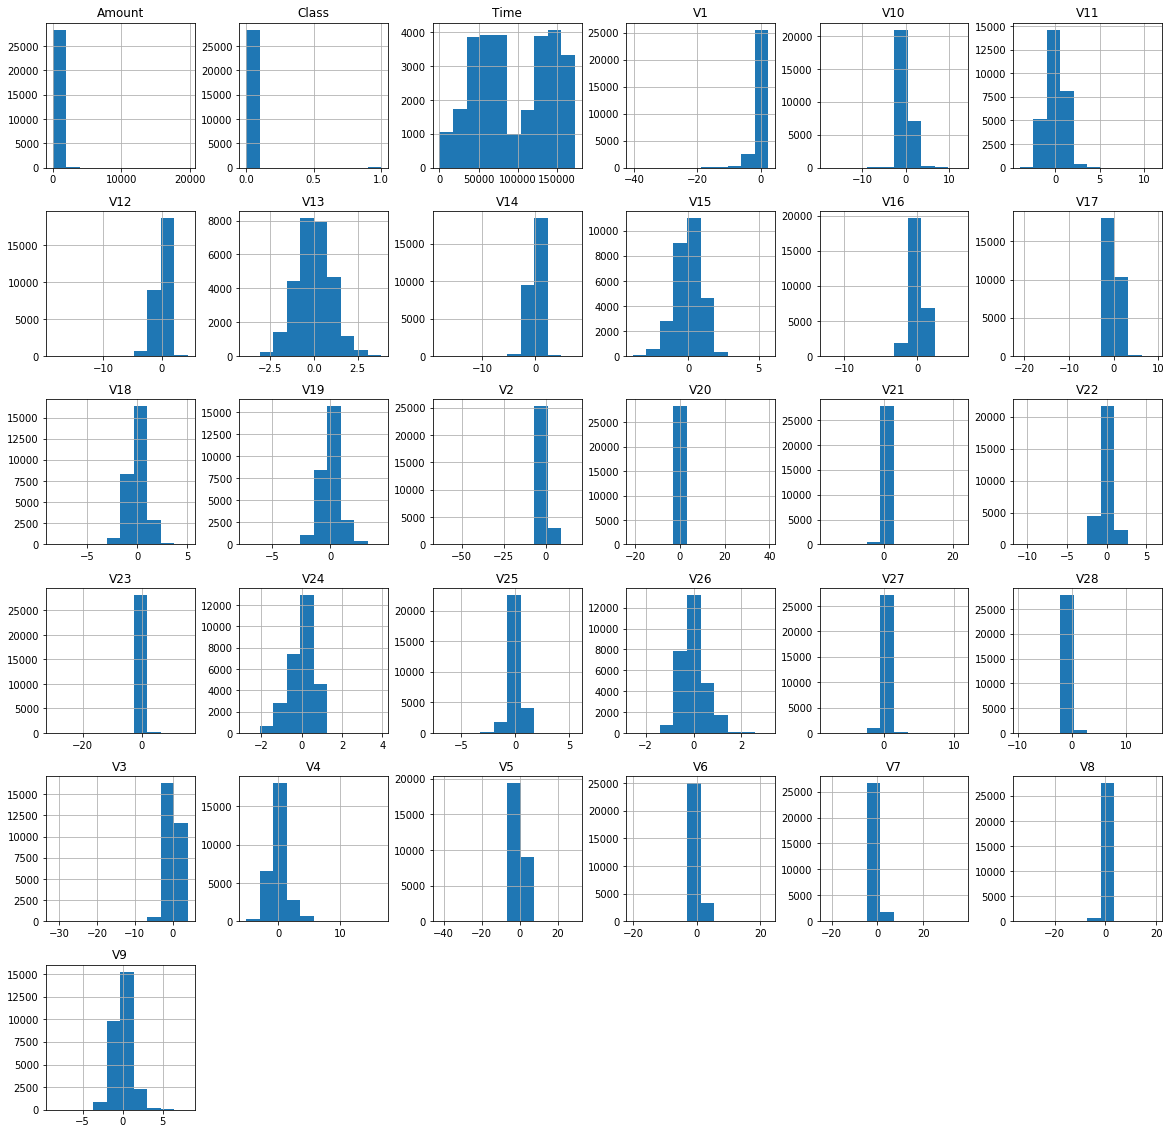

In [9]:
#plot histogram
df.hist(figsize = (20,20))
plt.show()

Outlier Fraction: 0.0017234102419808666
Fraudulent Cases: 49
Valid Cases: 28432


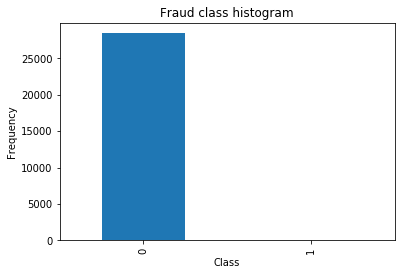

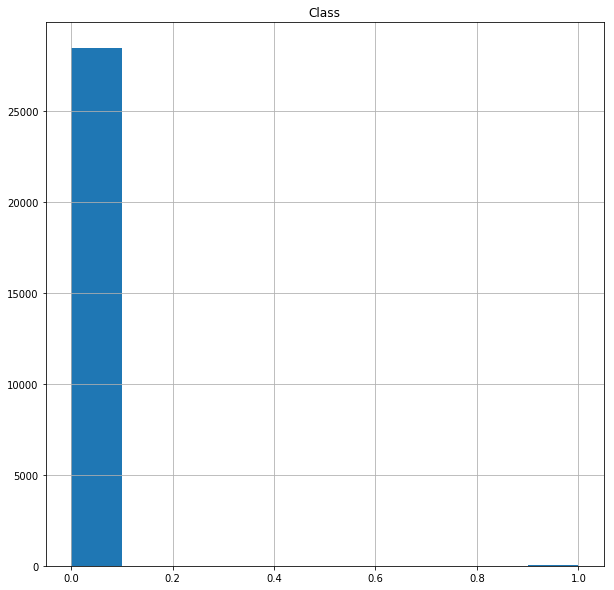

In [41]:
#Calculate valid and fraudulent cases
Fraud = df[df['Class'] == 1]
Valid = df[df['Class'] == 0]

outlier_fraction = len(Fraud) / float(len(Valid))
print('Outlier Fraction: {}'.format(Outlier_fraction))

print('Fraudulent Cases: {}'.format(len(Fraud)))
print('Valid Cases: {}'.format(len(Valid)))

count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

df.hist(column = "Class", figsize = (10,10))
plt.show()


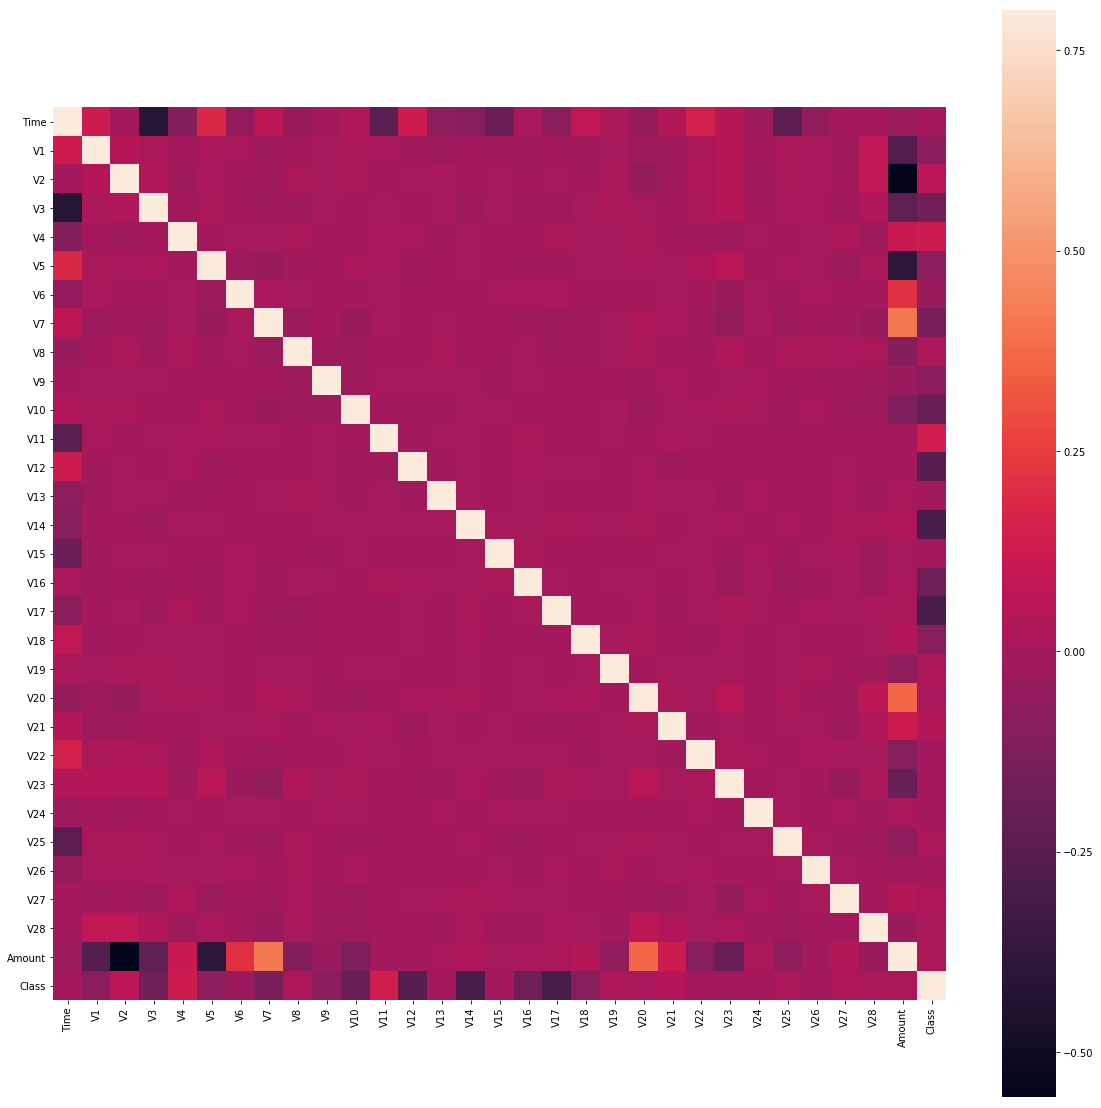

In [16]:
corrmat = df.corr()
fig = plt.figure(figsize = (20,20))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

This heatmap shows that there is low correlation between the different V-variables, and that there is low correlation between the amount of the transaction and the time, and whether it is a fraud or not.

We can see that variables like V17, V14 and V12 has negative correlation with the class. This means that the lower these variables are the more likely the transaction is a fraud, purely based on correlation. The opposite is true for V11.

In [17]:
#Remove the Class column from the dataframe to prepare it for machine learning

columns = df.columns.tolist()

columns = [column for column in columns if column not in ["Class"]]

target = "Class"

X = df[columns]
Y = df[target]

#Check the data
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [18]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

The Local Outlier Factor is an unsupervised method that calculates the local deviation of density of a sample compared to its neighbors, in the same way as a k-nearest method. In other words, the samples are clustered and then compared to its cluster.

The Isolation Forest method is a fast algorithm that seeks to isolate samples to evaluate how anomolous they are. By randomly splitting features, the anomalies will require less work on average over features to be isolated and will be given a higher anomaly score.

In [22]:
state = 1

classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                       contamination = outlier_fraction,
                                       random_state = state),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors = 20,
                                              contamination = outlier_fraction)
}

In [24]:
#Fitting the models

n_outliers = len(Fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    if clf_name == "Local Outlier Factor":
        y_predict = clf.fit_predict(X)
        scores_predict = clf.negative_outlier_factor_
    
    else:
        clf.fit(X)
        scores_predict = clf.decision_function(X)
        y_predict = clf.predict(X)
    
    #Fit the results to the Class variable format
    y_predict[y_predict == 1] = 0
    y_predict[y_predict == -1] = 1
    
    n_errors = (y_predict != Y).sum()
    
    #Run the classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_predict))
    print(classification_report(Y, y_predict))
        

Isolation Forest: 71
0.997507110003
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.28      0.29      0.28        49

avg / total       1.00      1.00      1.00     28481

Local Outlier Factor: 97
0.996594220709
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.02      0.02      0.02        49

avg / total       1.00      1.00      1.00     28481



While we can see that the accuracy score for both classifiers is high, the classification report shows the precision (how many of the anomalies are actual frauds) and the recall (how many of the frauds are predicted as anomalies) being better for the Isolation Forest classifiers.